# Task 1 – Dimensionality reduction


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



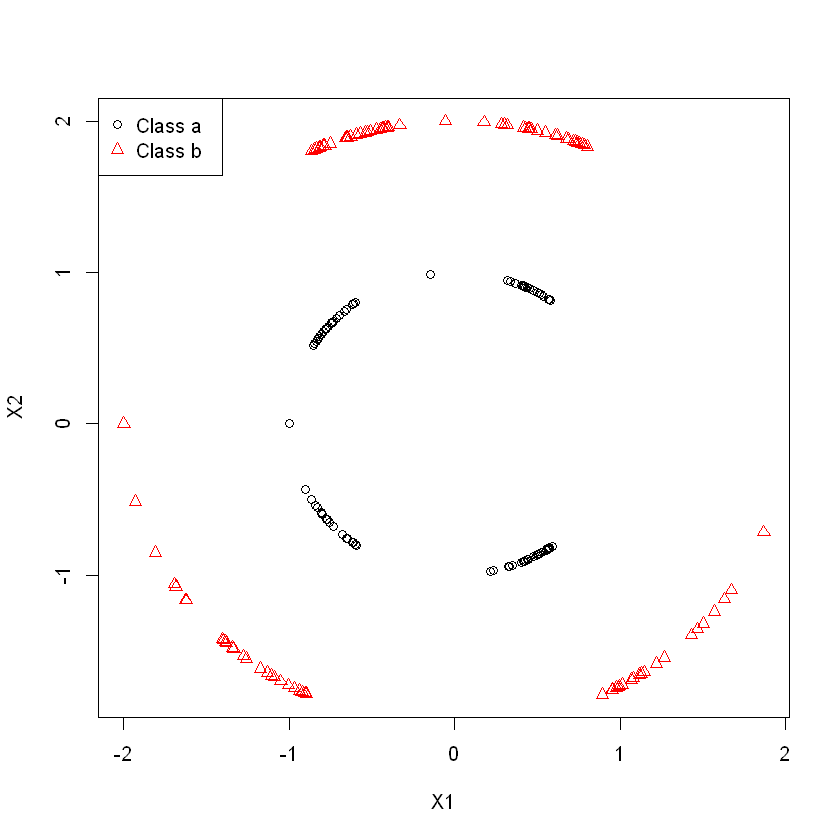

In [2]:
install.packages("ggplot2")
library("ggplot2")
#Scatter plot of the feature X1 versus X2 and the class information
dat=read.csv('IE582_Fall21_HW2_q1_data.csv',header=T)
lev=as.numeric(dat[,3])
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

# a)

In [4]:
data_numeric <- dat[,1:2]
data_class <- dat[,3]
pca <- princomp(data_numeric, cor=T)
#Summary
summary(pca, loadings=T)

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

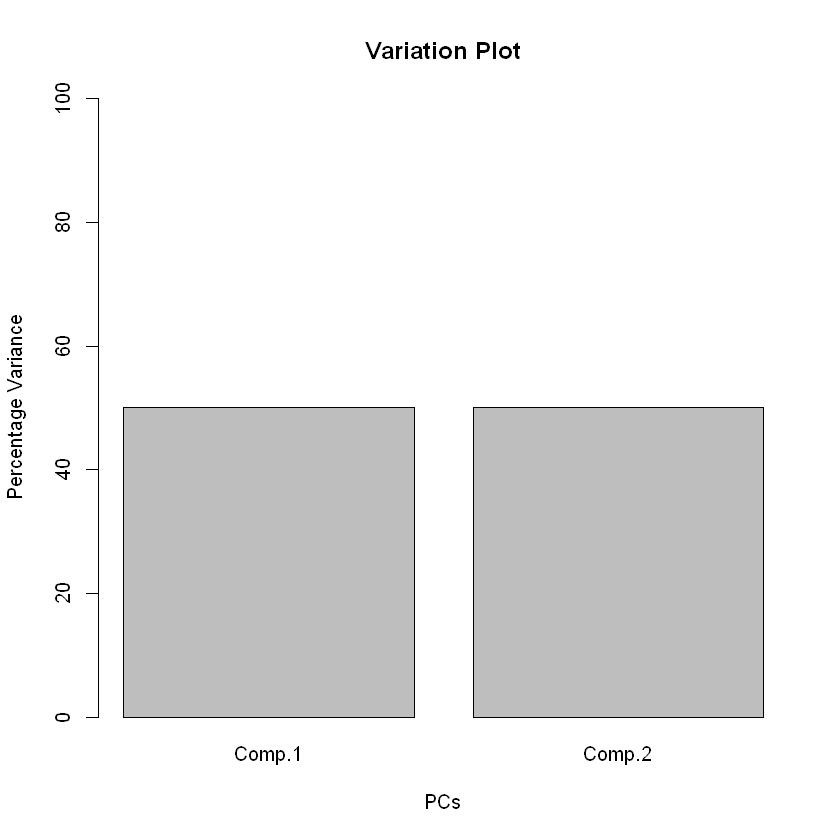

In [43]:
pca_var <- pca$sdev^2
pca_var_perc <- round(pca_var/sum(pca_var) * 100, 1)
barplot(pca_var_perc, main = "Variation Plot", xlab = "PCs", ylab = "Percentage Variance", ylim = c(0, 100))

*As we can understand from the barplot above and the Proportion of Variance information, each eigenvalue accounts for about half the variance, so the PCAsuggested dimension is 2. But in the question, we were asked to reduce the number of dimensions to one. Let's select the first component and see our data in the graph.*

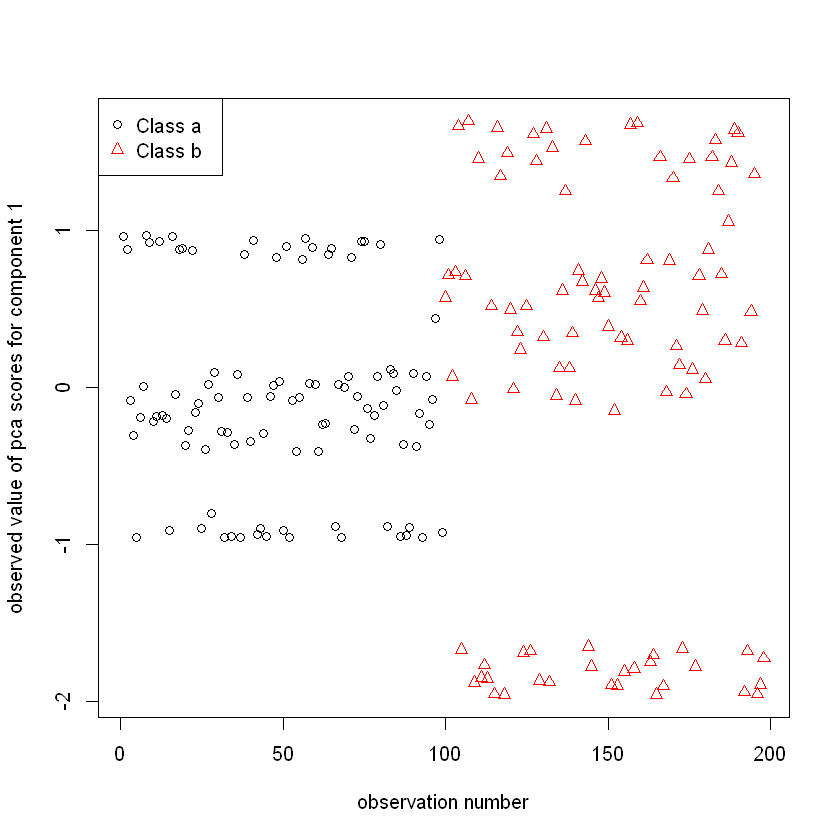

In [10]:
plot(pca$scores[,1],col=lev,pch=lev,xlab='observation number',ylab='observed value of pca scores for component 1')
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

# b)

In [45]:
#For two different similarity, I chose two different distance methods: Euclidian and Manhattan
distance.matrix_first <- dist(data_numeric, diag=TRUE, upper=TRUE, method = 'euclidian')
distance.matrix_second <- dist(data_numeric, diag=TRUE, upper=TRUE, method = 'manhattan')
## MDS (this is basically eigen value decomposition)
mds_first <- cmdscale(distance.matrix_first, eig=TRUE, x.ret=TRUE, k=1)
mds_second <- cmdscale(distance.matrix_second, eig=TRUE, x.ret=TRUE, k=1)

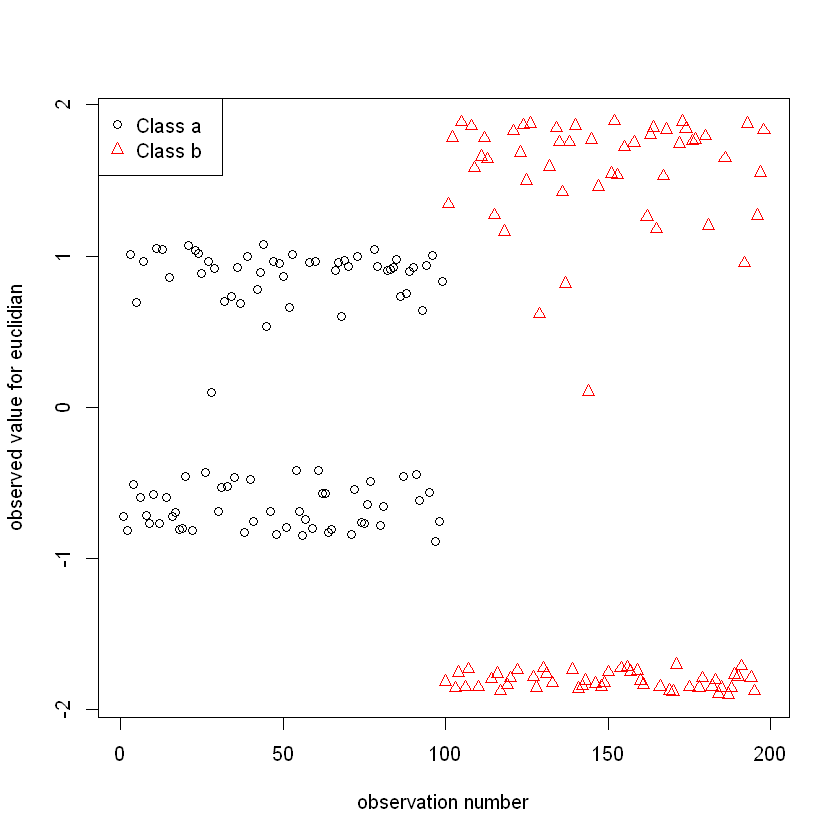

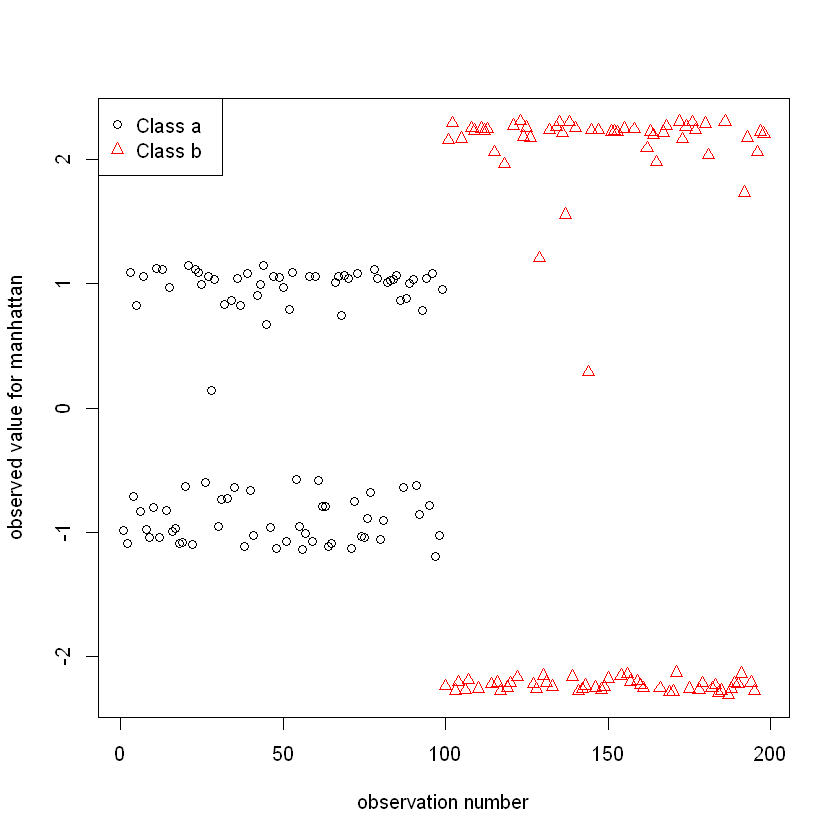

In [15]:
#plots for two different mds
plot(mds_first$points,col=lev,pch=lev,xlab='observation number',ylab='observed value for euclidian')
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(mds_second$points,col=lev,pch=lev,xlab='observation number',ylab='observed value for manhattan')
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

# c)

*1) Since the two components share the variance equally, we observe that the data is still scattered and cannot be sufficiently characterized by a single dimension in the graph that we have reduced to one dimension with PCA.*

*2) We see from plots that we can get down to one dimension with the MDS method, losing less information than PCA. And when we use Manhattan distance, we can notice that the aggregations on the graph are more regular and the outlier points are less.*

*3)As we mentioned in Part 2, the MDS method allowed us to descend into one dimension with less information loss. This is probably related to the circular behavior of the data we have.*

# d)

In [31]:
data_numeric_added_columns <- data_numeric
data_numeric_added_columns[,3] <- data_numeric[,1]^2
data_numeric_added_columns[,4] <- data_numeric[,2]^2
data_numeric_added_columns[,5] <- data_numeric[,1]*data_numeric[,2]

In [32]:
head(data_numeric_added_columns)

,X1,X2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5694828,0.8220033,0.3243106,0.6756894,0.4681167
2,0.4114692,0.9114237,0.1693069,0.8306931,0.3750228
3,0.4173846,-0.9087299,0.1742099,0.8257901,-0.3792899
4,-0.7918276,0.6107447,0.6269909,0.3730091,-0.4836045
5,-0.8067767,-0.5908565,0.6508886,0.3491114,0.4766892
6,-0.7154271,0.6986874,0.5118360,0.4881640,-0.4998599


In [33]:
pca2 <- princomp(data_numeric_added_columns, cor=T)
#Summary
summary(pca2, loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1  0.419  0.556  0.128  0.571  0.415
X2  0.538 -0.454        -0.368  0.600
V3 -0.539  0.162  0.578 -0.273  0.524
V4  0.351 -0.313  0.797  0.127 -0.356
V5 -0.348 -0.600         0.669  0.258

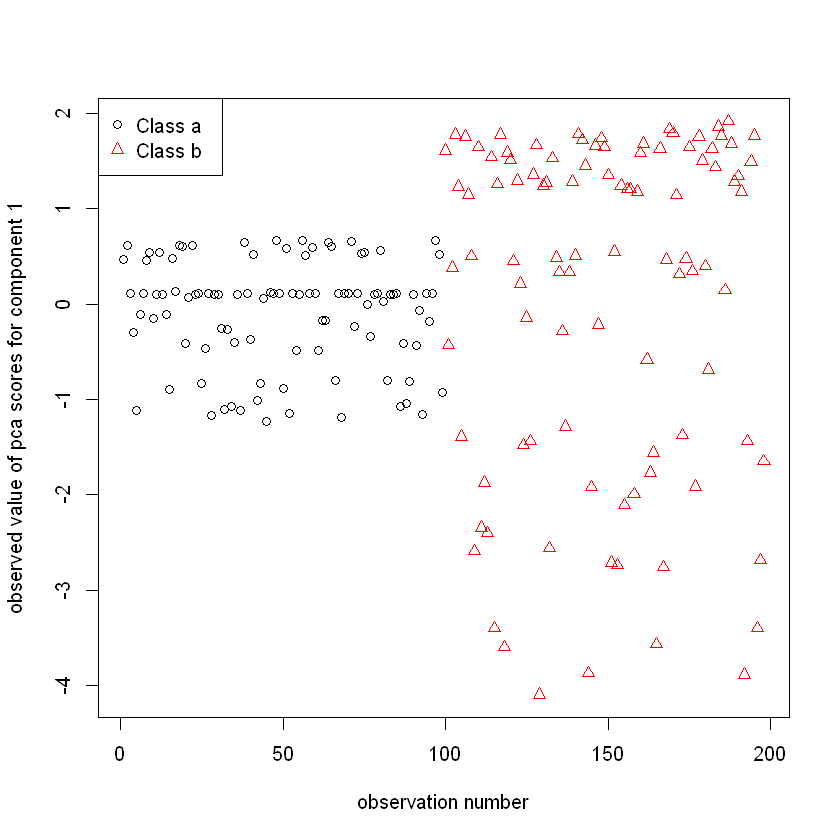

In [42]:
plot(pca2$scores[,1],col=lev,pch=lev,xlab='observation number',ylab='observed value of pca scores for component 1')
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

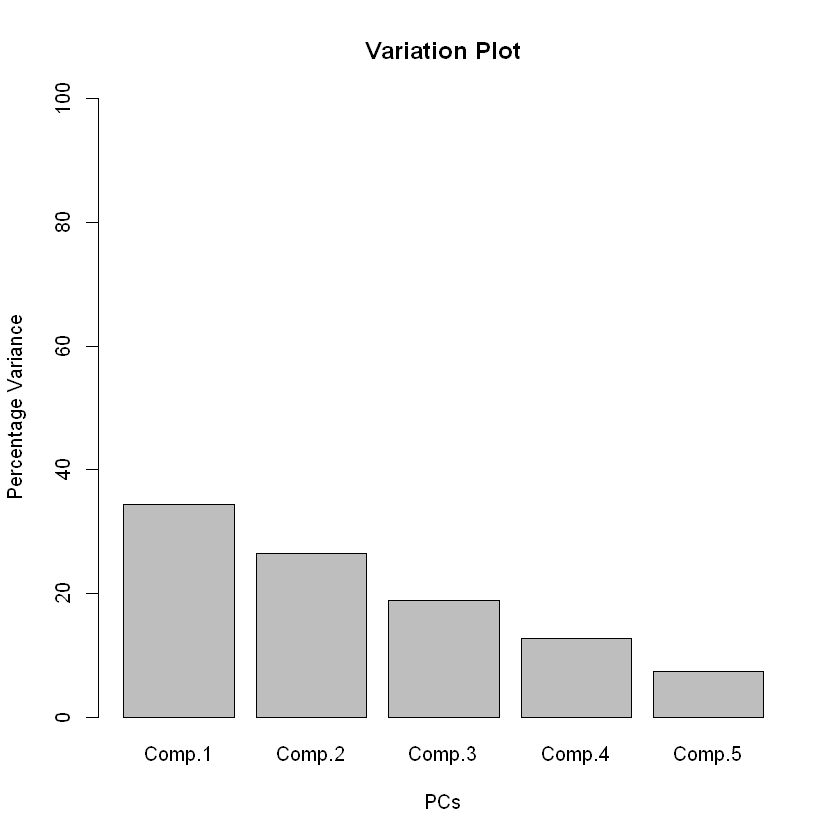

In [44]:
pca_var_2 <- pca2$sdev^2
pca_var_perc_2 <- round(pca_var_2/sum(pca_var_2) * 100, 1)
barplot(pca_var_perc_2, main = "Variation Plot", xlab = "PCs", ylab = "Percentage Variance", ylim = c(0, 100))

*We have 5 components at this time and the first two component can explain just half of our data. Remember, before adding new columns, first component can explain 50% of our data, but now descending to one dimension make us to lose a lot of information from our new data. And looking at the graph we drew for component 1, we can see that our data is more messy than in the previous scenario.*

# Task 2 – Reconstructing Turkey Map

In [ ]:
#install.packages("readxl")
#library("readxl")
#reading the file and converting an integer matrix
distance_data <- read_excel("ilmesafe.xls")
distance_data_numeric <- as.matrix(distance_data[2:82,3:83])
distance_data_numeric[is.na(distance_data_numeric)] = 0
distance_data_numeric <- mapply(distance_data_numeric, FUN=as.integer)
distance_data_numeric <- matrix(data=distance_data_numeric, ncol=81, nrow=81)
#making matrix symmetric
distance_data_numeric[lower.tri(distance_data_numeric,diag=T)] = 0
distance_data_numeric <- distance_data_numeric + t(distance_data_numeric)

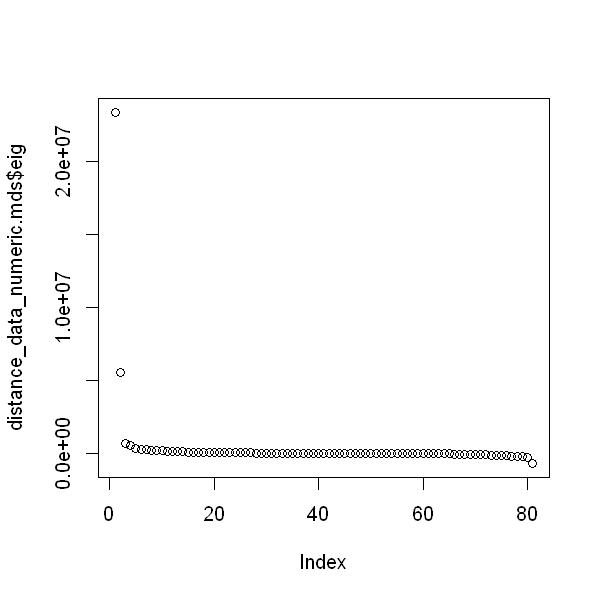

In [52]:
distance_data_numeric.mds <- cmdscale(distance_data_numeric, eig = TRUE, k=2)
#The $eig argument gives us how much variance is contributed by each of eigenvalues. 
#We can see that the first two capture almost everything, a third dimension looks unneccessary.
options(repr.plot.width=5, repr.plot.height=5)
plot(distance_data_numeric.mds$eig)

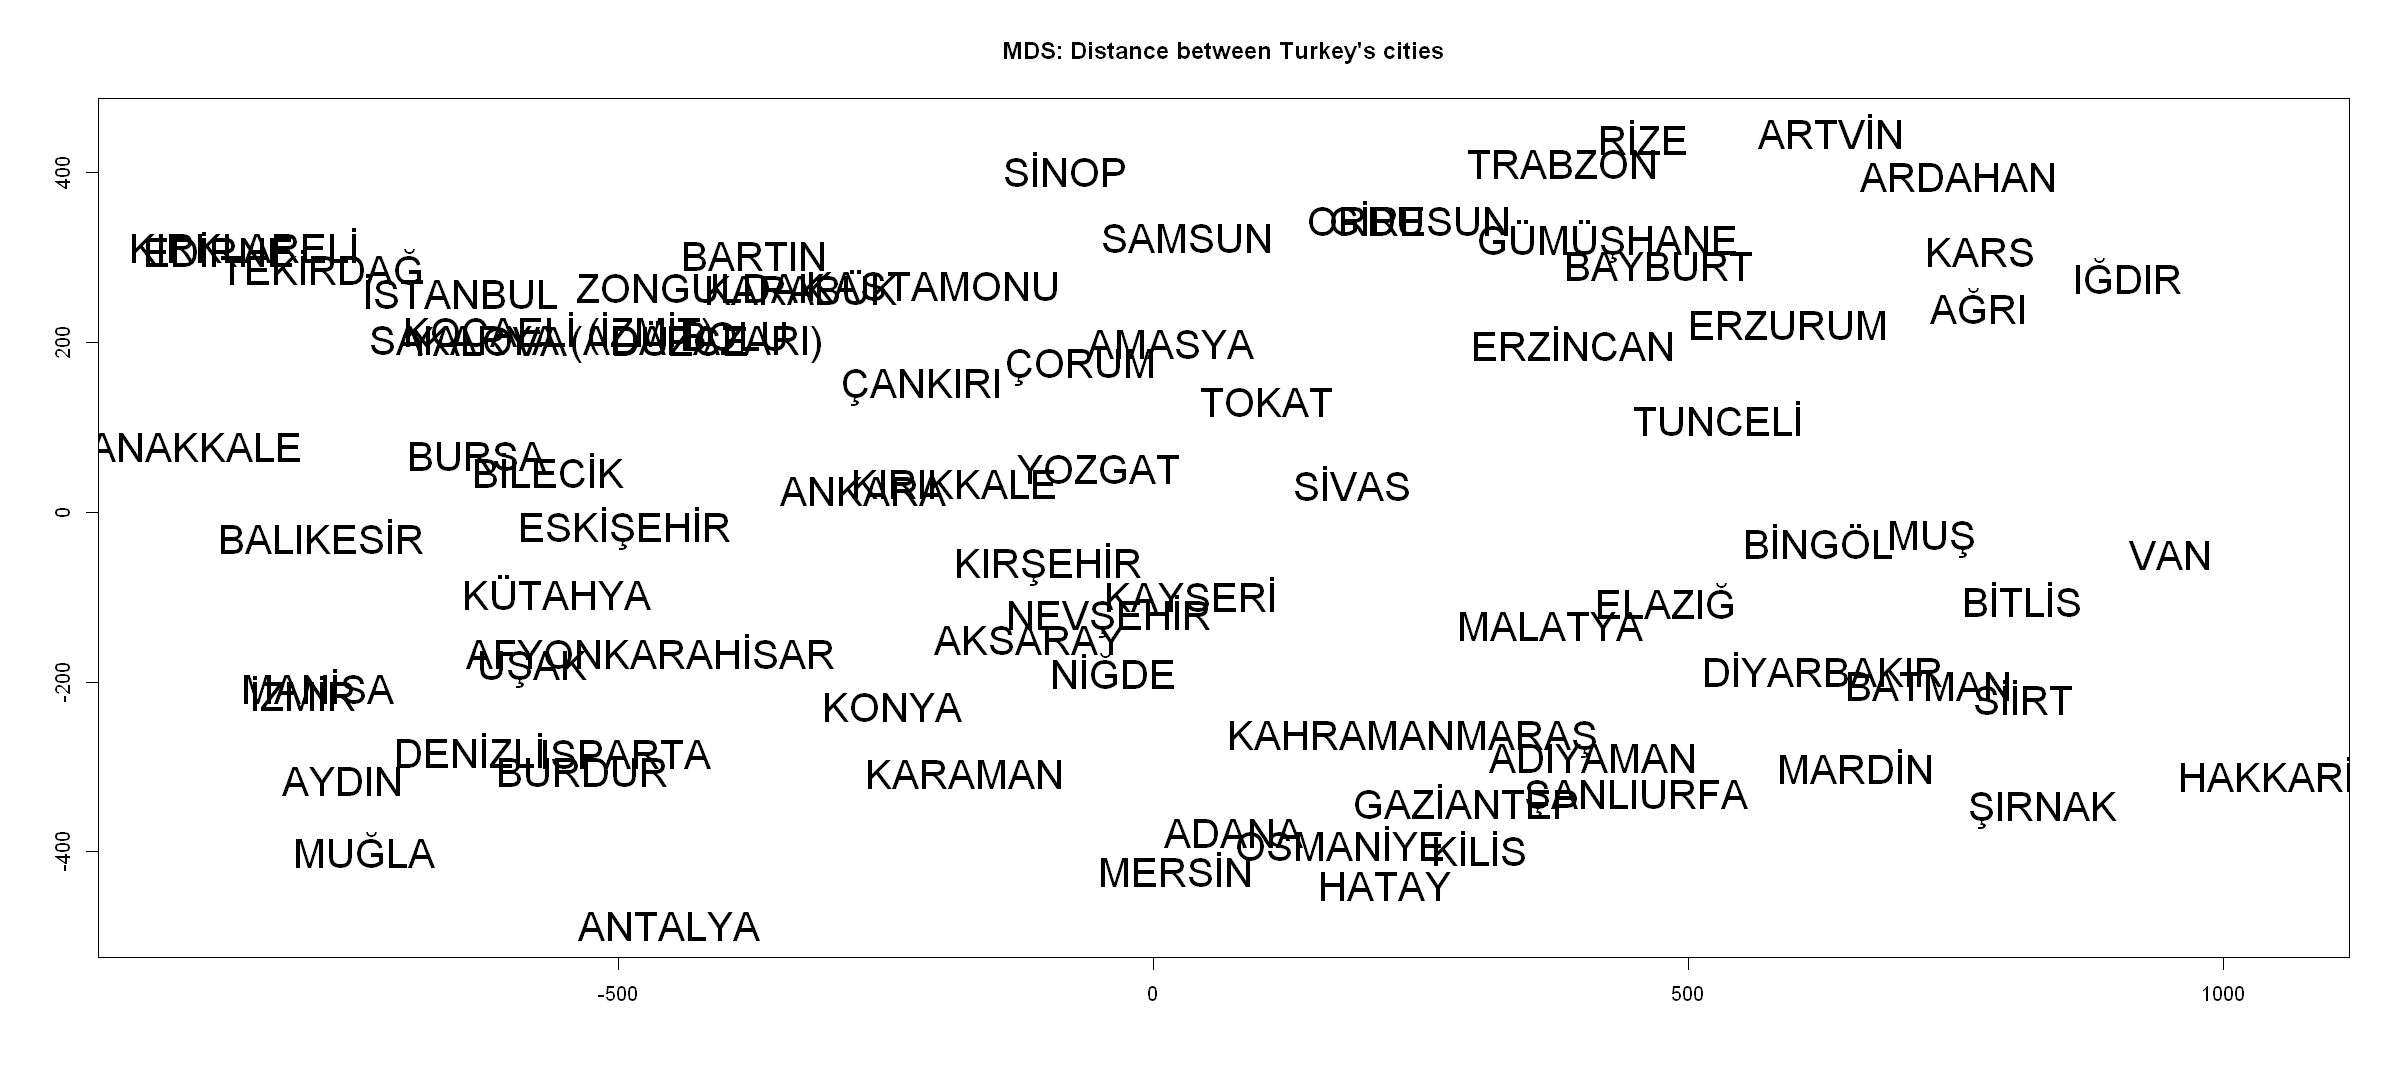

In [53]:
rownames(distance_data_numeric.mds$points) <- c(t(distance_data[2:82,2]))
Dim1 <- distance_data_numeric.mds$points[, 1]
Dim2 <- distance_data_numeric.mds$points[, 2]
options(repr.plot.width=20, repr.plot.height=9)
plot(Dim1, Dim2, type = "n", xlab = "", ylab = "", main = "MDS: Distance between Turkey's cities")
text(Dim1, Dim2, rownames(distance_data_numeric.mds$points), cex = 2)